##### Prétraitement d’une image textuelle en vue d’une reconnaissance de caractères (OCR : Optical Character Recognition) à l’aide d’OpenCV 

#### 01. Importation des bibliotheques

In [2]:
import cv2                          
import numpy as np   
from IPython.display import Image, display

<span style="color:red">Version de NumPy : 2.2.x et version de Python : 3.10, 3.11 ou 3.12</span>


#### 02. Lire l'image

In [3]:
file_image = r"D:\Ppt_Computer_Vision\Cas_Partique\data\image.jpg"
img = cv2.imread(file_image)

In [4]:
cv2.imshow("image" , img)
cv2.waitKey(0)

-1

#### 03. Inversion des pixels

In [5]:
inver_image = cv2.bitwise_not(img)
cv2.imwrite(r"D:\Ppt_Computer_Vision\Cas_Partique\new_data\image_invr.jpg", inver_image)

True

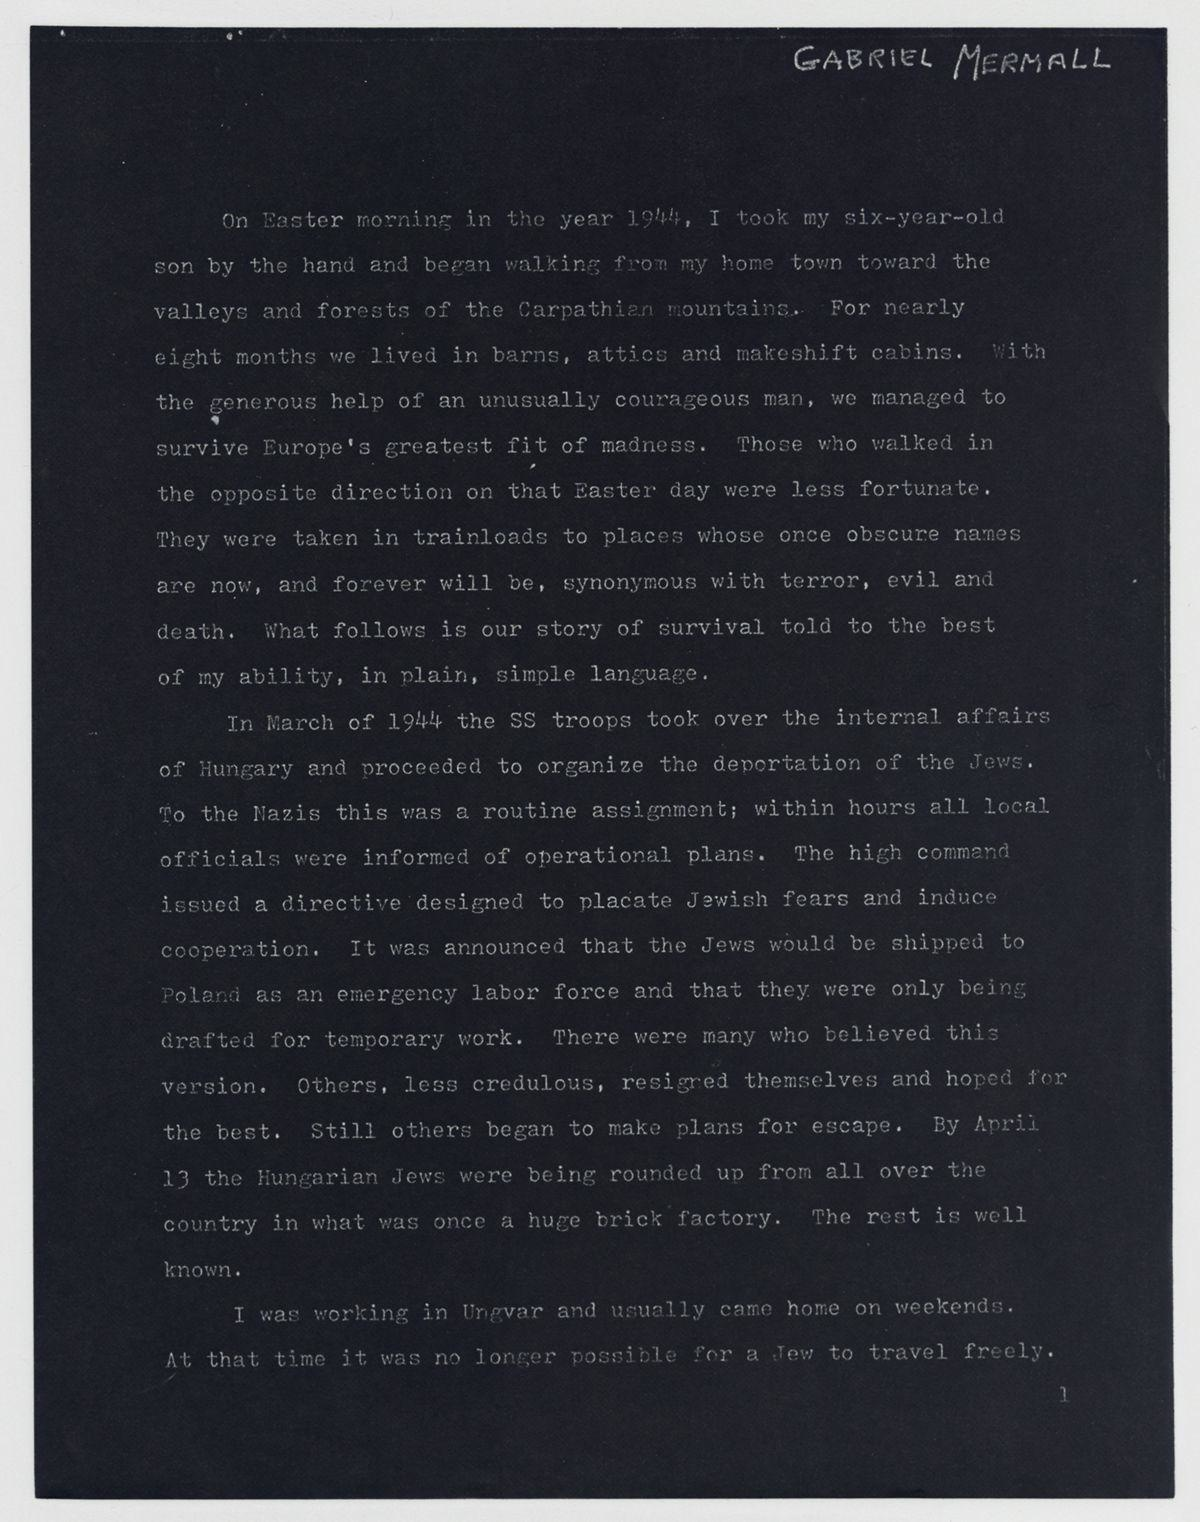

In [6]:
display(Image(filename=r"D:\Ppt_Computer_Vision\Cas_Partique\new_data\image_invr.jpg"))

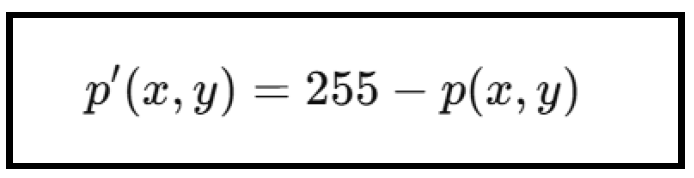

#### 04. Conversion en niveaux de gris

In [10]:
def niveau_gris(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

<span style="color:red"> Attention : La norme utilisee par OpenCV c'est <span style="color:blue">BGR</span> et pas <span style="color:blue">RGB</span>


In [11]:
image_gris = niveau_gris(img)
cv2.imwrite(r"D:\Ppt_Computer_Vision\Cas_Partique\new_data\image_gris.jpg", image_gris)

True

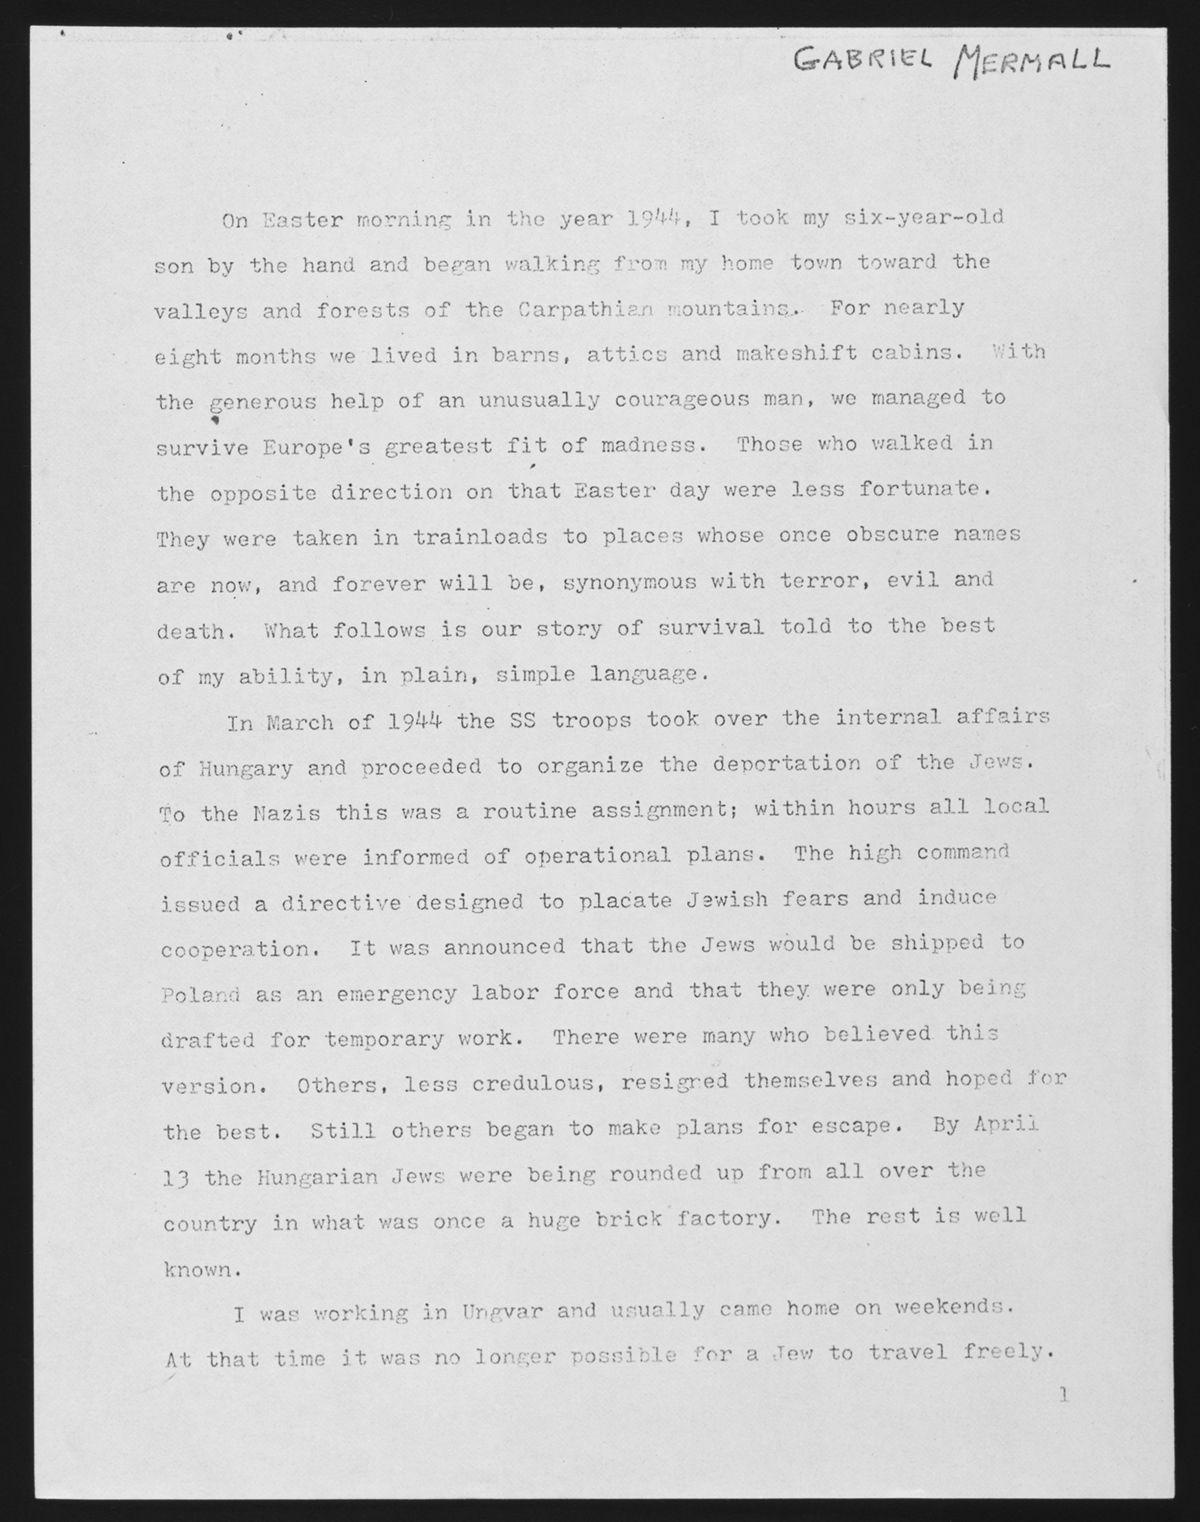

In [12]:
display(Image(filename=r"D:\Ppt_Computer_Vision\Cas_Partique\new_data\image_gris.jpg"))

#### 04.1 Affichage d'image gris

In [ ]:
display(Image(filename=r"D:\Ppt_Computer_Vision\Cas_Partique\new_data\image_gris.jpg"))

#### 04.2 Explication de calcule

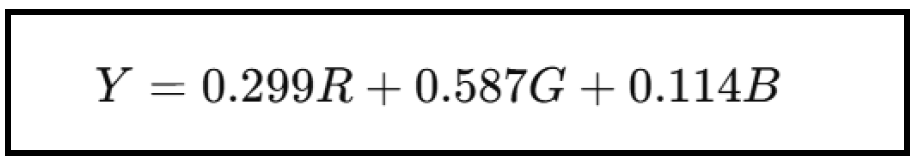

<span style="color:red">Ces coefficients reflètent la sensibilité de l’œil humain</span>

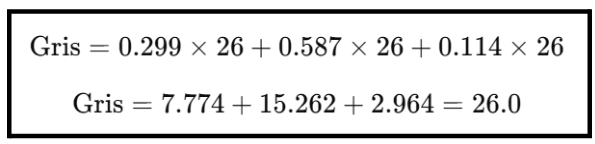

#### 05. Binarisation d'image

In [14]:
seuil, img_nb = cv2.threshold(image_gris, 210, 220 , cv2.THRESH_BINARY)
cv2.imwrite(r"D:\Ppt_Computer_Vision\Cas_Partique\new_data\nb_image.jpg",img_nb)

True

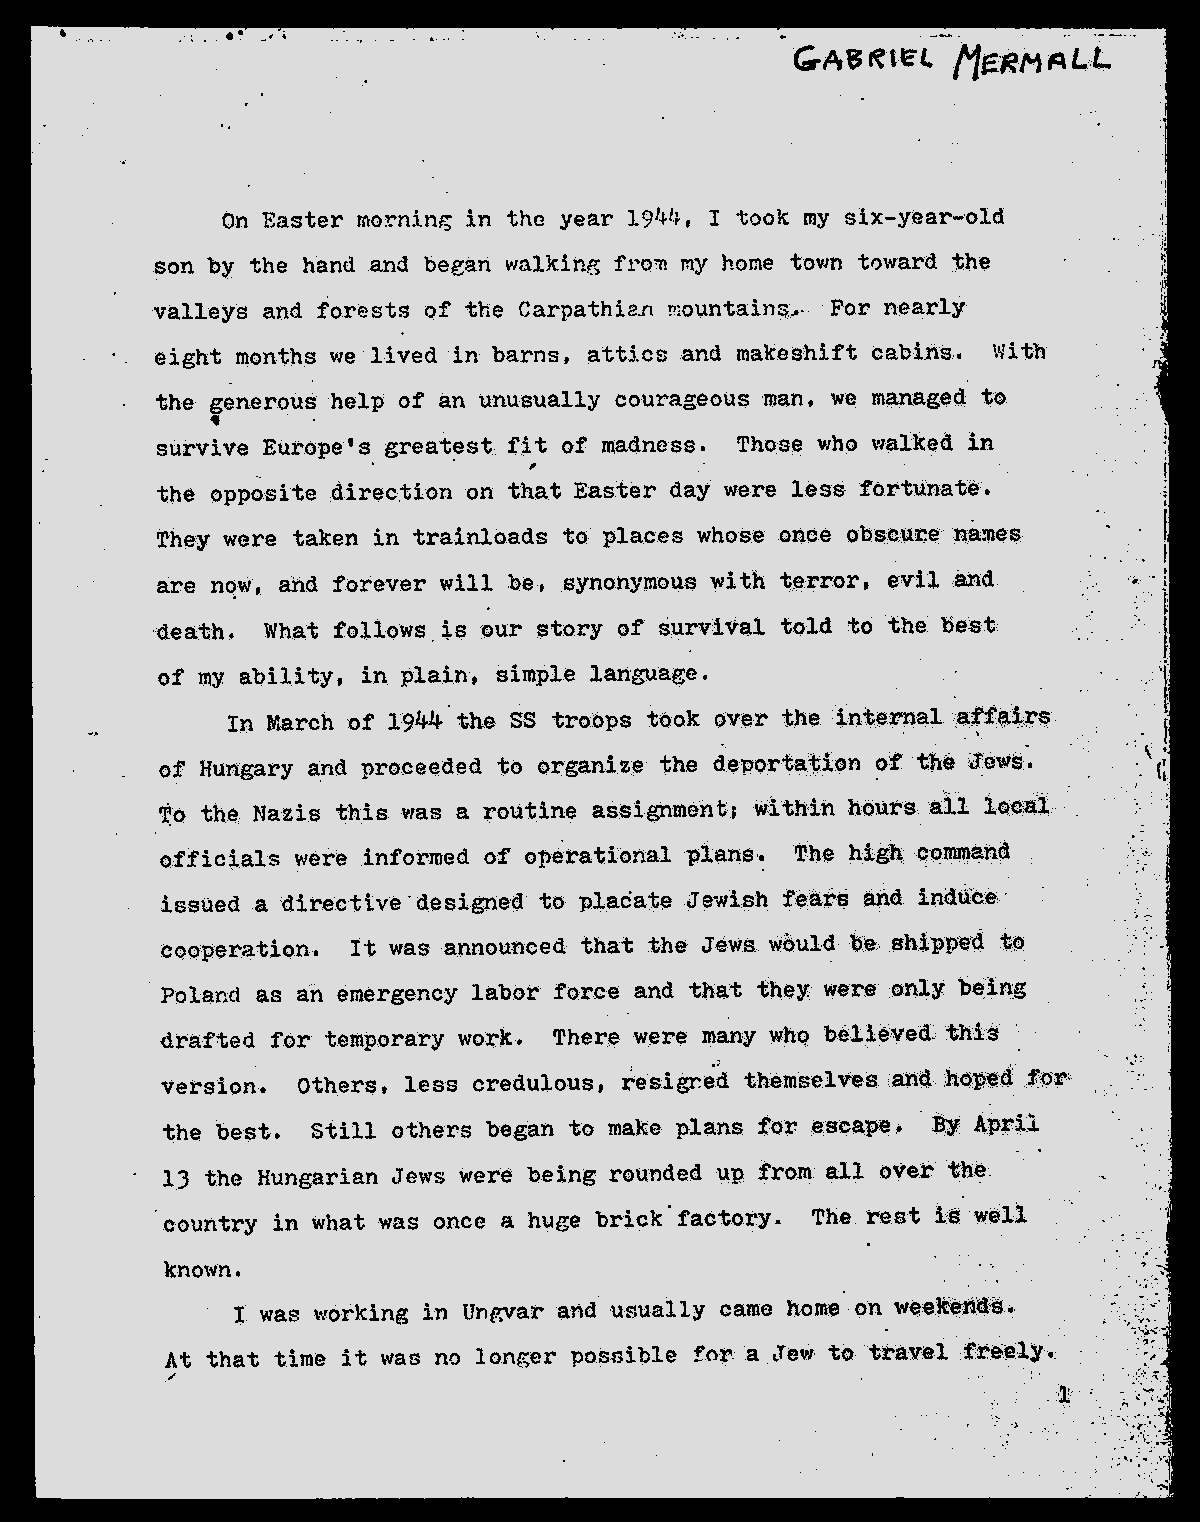

In [15]:
display(Image(filename=r"D:\Ppt_Computer_Vision\Cas_Partique\new_data\nb_image.jpg"))

#### 06. Reduction du bruit

In [17]:
def suppression_bruit(image): 
    kernel = np.ones((2,2), np.uint8) 
    image = cv2.morphologyEx(image , cv2.MORPH_CLOSE, kernel)
    return (image)

<span style="color:red">Les opérations morphologiques sont des transformations basées sur la forme des objets dans une image binaire</span>

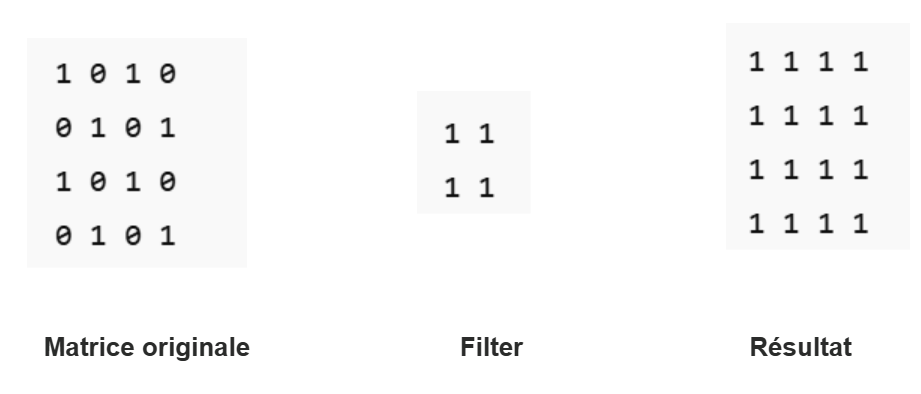

In [18]:
image_sans_bruit = suppression_bruit(img_nb)
cv2.imwrite(r"D:\Ppt_Computer_Vision\Cas_Partique\new_data\image_sans_bruit.jpg", image_sans_bruit)

True

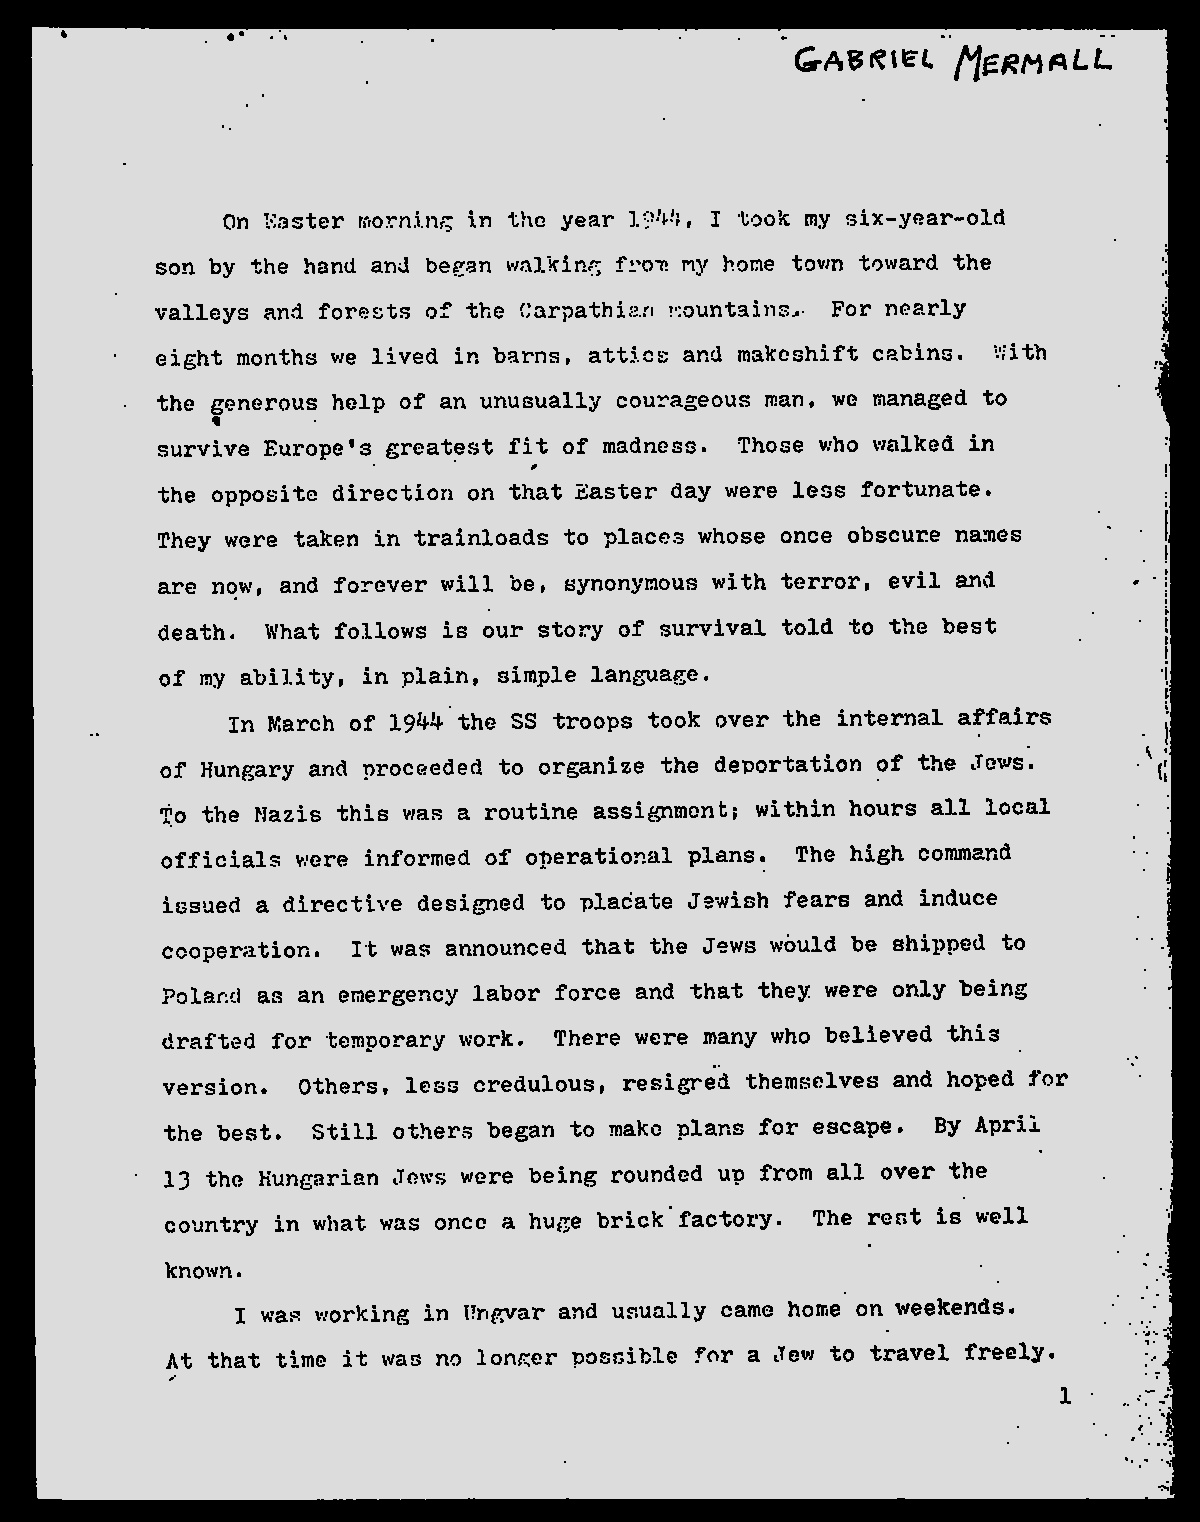

In [19]:
display(Image(filename=r"D:\Ppt_Computer_Vision\Cas_Partique\new_data\image_sans_bruit.jpg"))

#### 07. Renforcement des lettres (dilatation légère)

In [21]:
def delataion_legere(image):
    kernel = np.ones((2,2), np.uint8)
    image = cv2.dilate(image_sans_bruit, kernel, iterations=1)
    return (image)

<span style="color:red">La dilatation agrandit les pixels blancs</span>

In [29]:
image_delate = delataion_legere(image_sans_bruit)
cv2.imwrite(r"D:\Ppt_Computer_Vision\Cas_Partique\new_data\image_delate.jpg",image_delate)

True

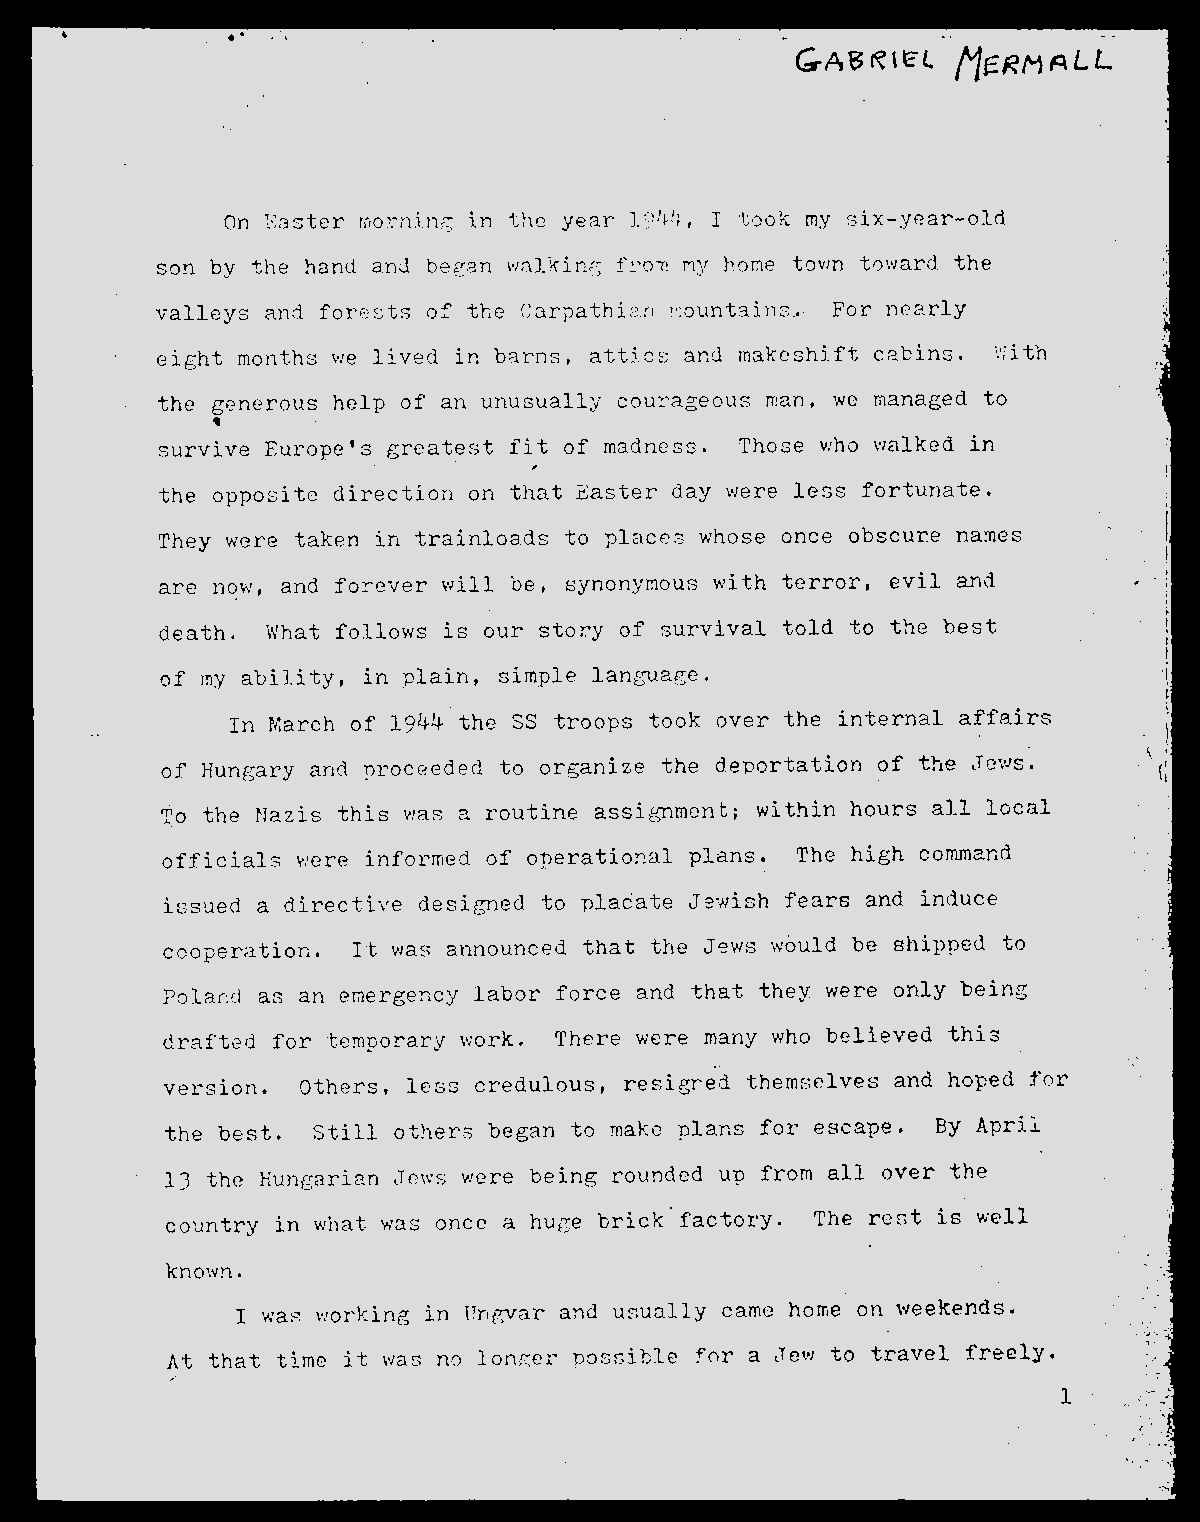

In [30]:
display(Image(filename=r"D:\Ppt_Computer_Vision\Cas_Partique\new_data\image_delate.jpg"))

#### 07. Supprimer les bordures

In [31]:
def supp_bordures(image):
    contours , heiarchy = cv2.findContours(image , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w , h = cv2.boundingRect(cnt)
    crop = image[y:y+h , x:x+w]
    return (crop)


In [32]:
sans_bordures = supp_bordures(image_delate)
cv2.imwrite(r"D:\Ppt_Computer_Vision\Cas_Partique\new_data\sans_bordures.jpg", sans_bordures)

True

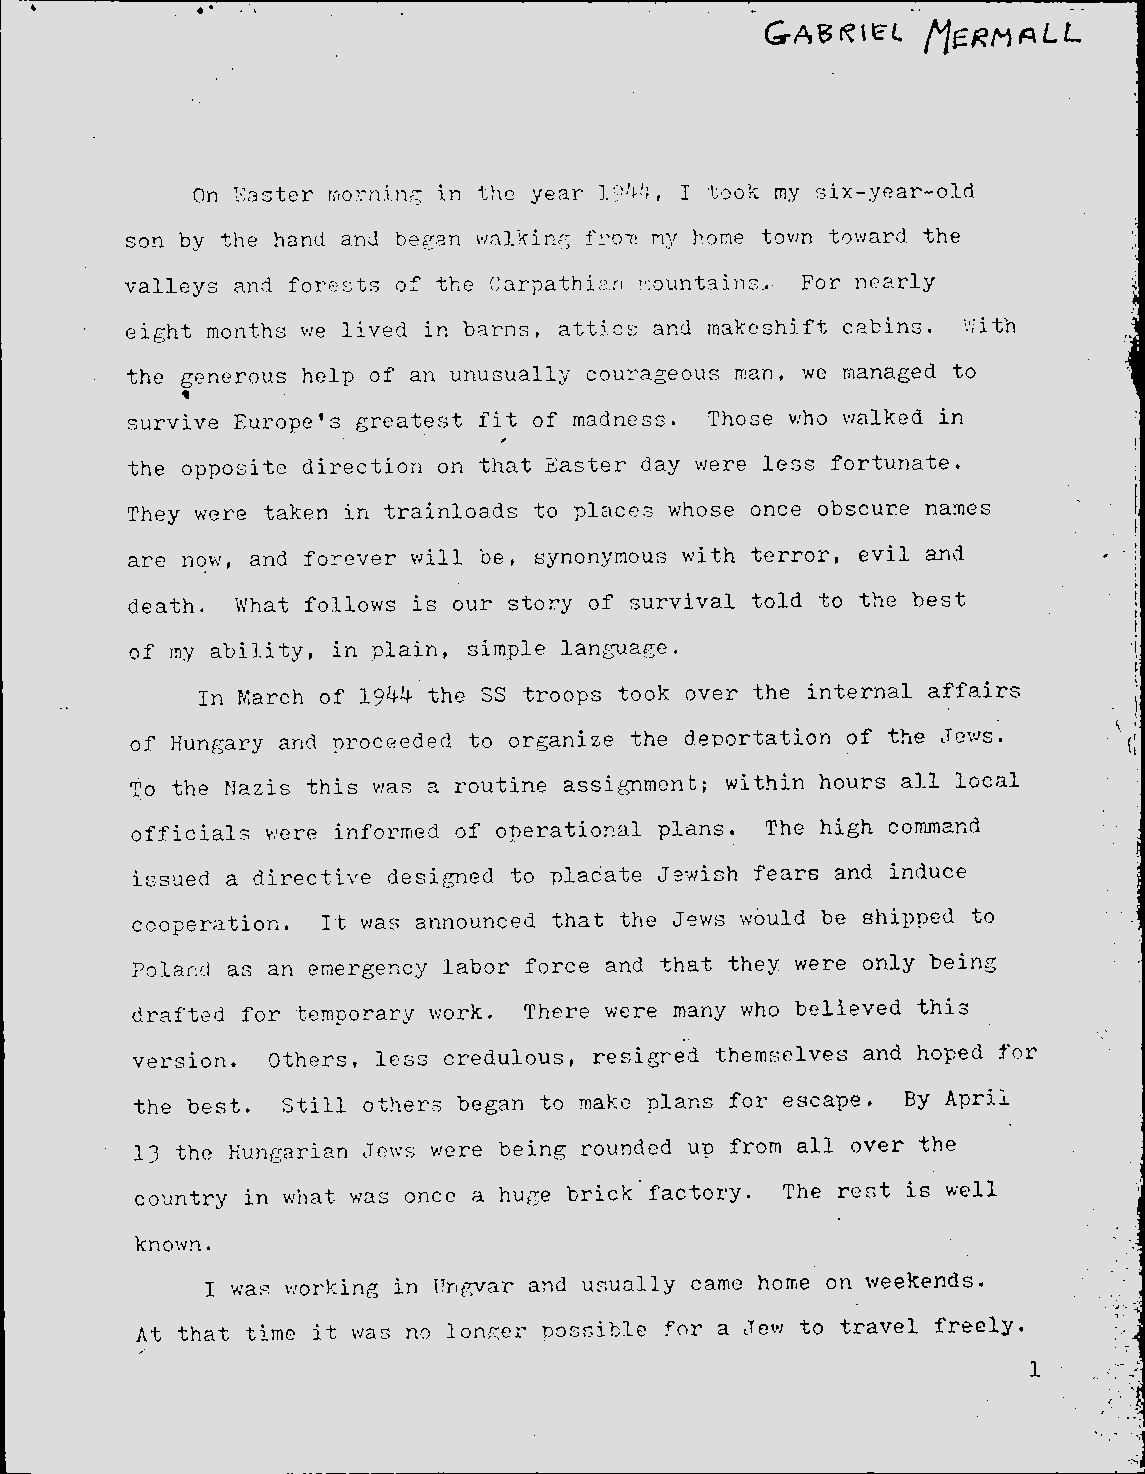

In [33]:
display(Image(filename=r"D:\Ppt_Computer_Vision\Cas_Partique\new_data\sans_bordures.jpg"))

#### 08. Bordures manquantes

In [34]:
color = [255,255,255]
top , bottom , left , right =  [150]*4

In [35]:
image_avec_bordures = cv2.copyMakeBorder(sans_bordures, top, bottom , left,right, cv2.BORDER_CONSTANT, value=color)

cv2.imwrite(r"D:\Ppt_Computer_Vision\Cas_Partique\new_data\image_avec_bordures.jpg", image_avec_bordures)

True

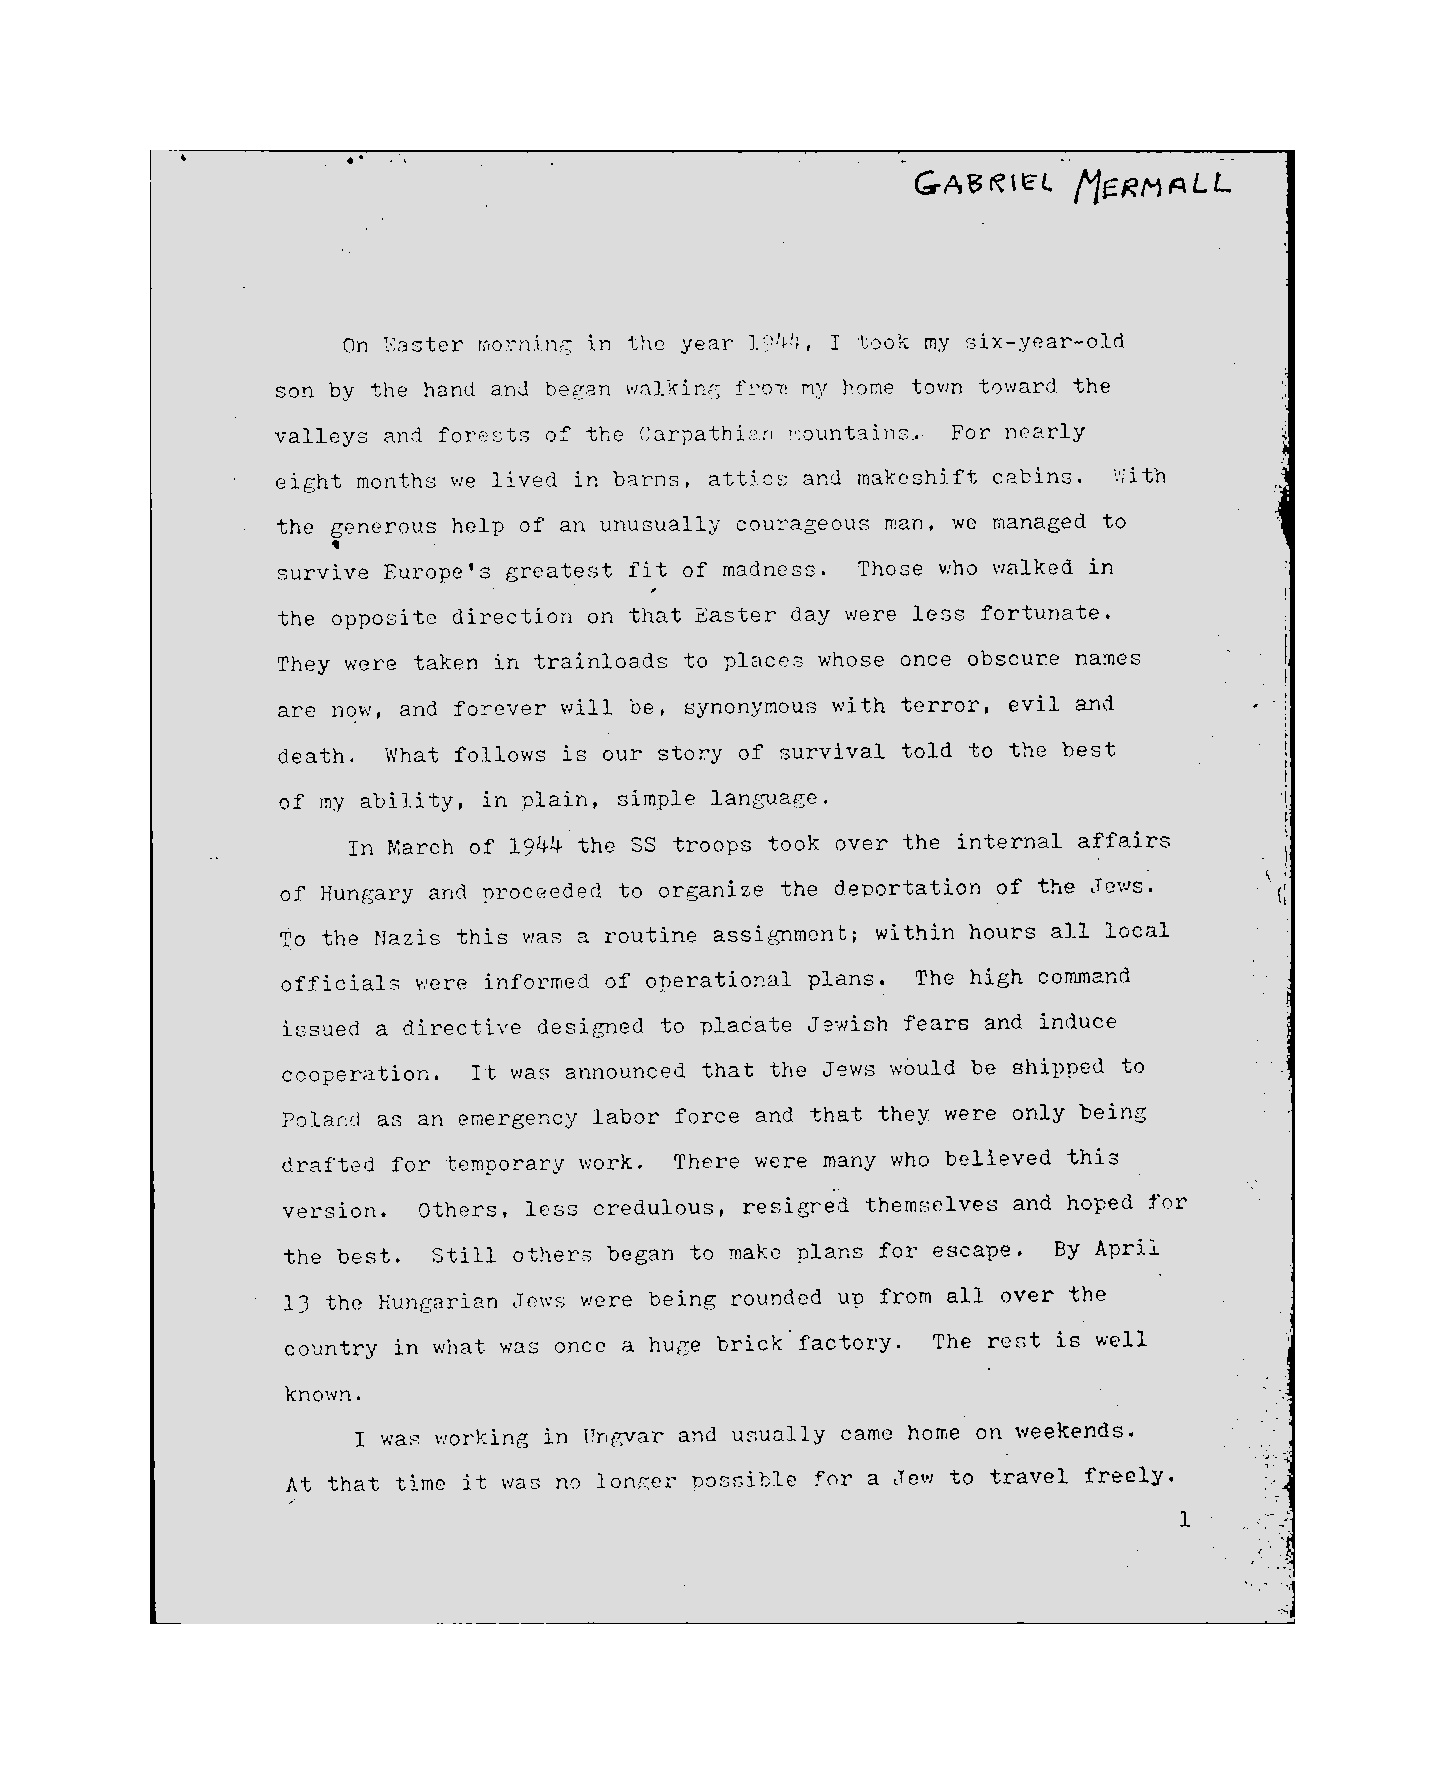

In [36]:
display(Image(filename=r"D:\Ppt_Computer_Vision\Cas_Partique\new_data\image_avec_bordures.jpg"))